In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
import torch
import sys
sys.path.append('../')
# densenet 2d
from monai.networks.nets import DenseNet121
from monai.visualize import GradCAM
from networks.Unet import *
from utils.file_utils import load_json
from utils.helper import show_img

import cv2
import matplotlib.pyplot as plt

In [2]:
def show_cam_on_image(img: np.ndarray,
                      mask: np.ndarray,
                      use_rgb: bool = False,
                      colormap: int = cv2.COLORMAP_JET) -> np.ndarray:
    """ This function overlays the cam mask on the image as an heatmap.
    By default the heatmap is in BGR format.
    :param img: The base image in RGB or BGR format.
    :param mask: The cam mask.
    :param use_rgb: Whether to use an RGB or BGR heatmap, this should be set to True if 'img' is in RGB format.
    :param colormap: The OpenCV colormap to be used.
    :returns: The default image with the cam overlay.
    """

    if np.max(img) > 1:
        print("The input image should np.float32 in the range [0, 1] \n Apply max-min to normalize to range [0, 1]")
        img = (img - img.min()) / (img.max() - img.min())
    
    if len(img.shape) == 2:
        img_arr = np.empty([256, 256, 3])
        img_arr[...] = np.expand_dims(img, axis=-1).astype(np.float32)

    heatmap = cv2.applyColorMap(np.uint8(255 * mask), colormap)
    if use_rgb:
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = np.float32(heatmap) / 255

    cam = heatmap + img_arr
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

In [3]:
data_json = '/data1/zfx/data/BileDuct/preprocessed_data/preprocess_dataset.json'
dataset = load_json(data_json)
test_data = dataset['test'][2]['preprocess_npy']

data = np.load(test_data)
index = 60
image = data[0][index]
label = data[1][index]

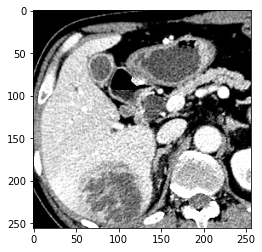

In [4]:
show_img(image[1])

In [7]:
model_path = '/data1/zfx/code/segBileDuct/model/BileDuct/Unet_dice_withBestModel.pt'
model = Unet(3, 1)
model.load_state_dict(torch.load(model_path, map_location='cuda:0'))

<All keys matched successfully>

In [9]:
image.shape

(9, 256, 256)

In [10]:
pre = model(torch.from_numpy(image[3:6].astype(np.float32)).unsqueeze(0))

/home/zfx/miniconda3/envs/zfx/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


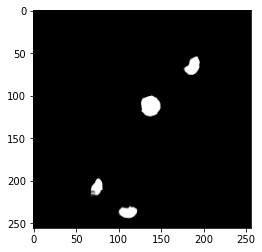

In [11]:
show_img(pre.squeeze().detach().numpy())

In [12]:
cam = GradCAM(nn_module=model, target_layers='conv1_')

In [14]:
result = cam(x=torch.from_numpy(image[3:6].astype(np.float32)).unsqueeze(0))

In [15]:
heatmap = result[0][0]

The input image should np.float32 in the range [0, 1] 
 Apply max-min to normalize to range [0, 1]


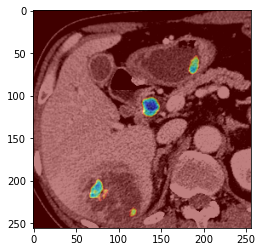

In [16]:
vis = show_cam_on_image(image[1], mask=heatmap, use_rgb=True)
plt.imshow(vis)
plt.show()

The input image should np.float32 in the range [0, 1] 
 Apply max-min to normalize to range [0, 1]


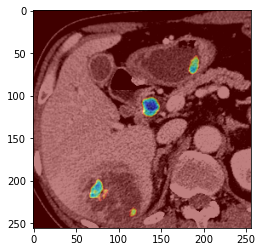

In [17]:
vis = show_cam_on_image(image[1], mask=heatmap, use_rgb=True)
plt.imshow(vis)
plt.show()

The input image should np.float32 in the range [0, 1] 
 Apply max-min to normalize to range [0, 1]


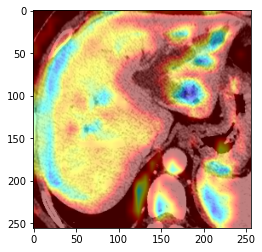

In [30]:
vis = show_cam_on_image(image[1], mask=heatmap, use_rgb=True)
plt.imshow(vis)
plt.show()

In [25]:
vis = show_cam_on_image(image[1], mask=heatmap, use_rgb=True)

The input image should np.float32 in the range [0, 1] 
 Apply max-min to normalize to range [0, 1]


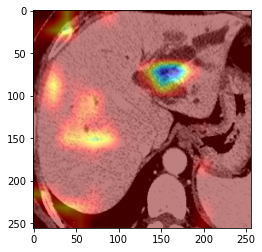

In [26]:
plt.imshow(vis)
plt.show()

In [19]:
img = image[1]
img = (img - img.min()) / (img.max() - img.min())
img_arr = np.empty([256, 256, 3])
img_arr[...] = np.expand_dims(img, axis=-1).astype(np.float32)

In [24]:
cv2.imwrite('img_arr.png', np.uint8(255 * img_arr))

True